In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from patsy import dmatrices, dmatrix
%matplotlib inline

In [2]:
# data from ISL book: https://trevorhastie.github.io/ISLR/data.html
df = pd.read_csv("Auto.csv")
df.columns    

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [15]:
# default data types
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


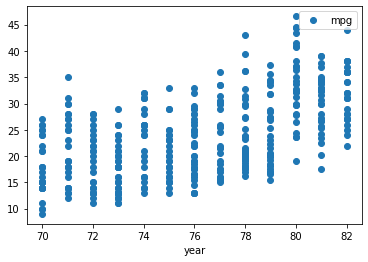

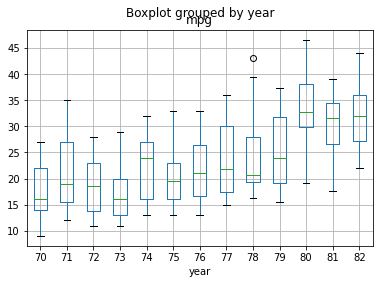

In [5]:
# use box-plot for categorical data 
# if results in categories are substantially difrent that feature might be important
_ = df.plot(x="year", y="mpg", style='o')
_ = df.boxplot(column="mpg", by="year") 

In [6]:
# dmatrices function splits and encodes data
# ''-1'' to have a model without the intercept
#models = [
#    'mpg ~ origin',
#    'mpg ~ C(origin)'
#    'mpg ~ C(origin) - 1',
#]
y, X = dmatrices('mpg ~ year', data=df, return_type='dataframe') 
model = sm.OLS(y, X) # Ordinary Least Squares 
result = model.fit()
X.dtypes

Intercept    float64
year         float64
dtype: object

In [7]:
result.params

Intercept   -70.200128
year          1.233187
dtype: float64

Intercept   -70.200128
year          1.233187
dtype: float64

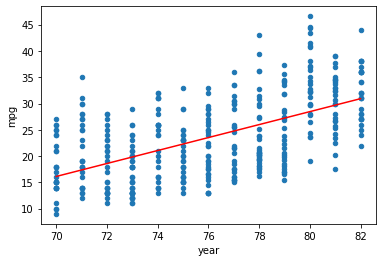

In [8]:
# we might treat categorical data as numerical but if would have diffrent meaning

# scatter-plot data
ax = df.plot(x='year', y='mpg', kind='scatter')

# plot regression line on the same axes
p = result.params
x = np.arange(70, 83, 1)
ax = ax.plot(x, p.Intercept + p.year  * x, 'r' )

p

In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     201.8
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           2.77e-37
Time:                        13:49:04   Log-Likelihood:                -1297.7
No. Observations:                 397   AIC:                             2599.
Df Residuals:                     395   BIC:                             2607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -70.2001      6.605    -10.628      0.000     -83.186     -57.214
year           1.2332      0.087     14.205      0.000       1.063       1.404
==============================================================================
Omnibus:                       22.297   Durbin-Watson:                   0.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.960
Skew:                           0.379   Prob(JB):                     0.000342
Kurtosis:                       2.376   Cond. No.                     1.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# indicate which columns should be treated as categorical
df_cat = df.astype({'year': 'category'})
df_cat.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower        object
weight             int64
acceleration     float64
year            category
origin             int64
name              object
dtype: object

In [11]:
# dmatrices encodes categorical data in 'one-hot' style
# diffrent type of encodings -> see e.g. http://pbpython.com/categorical-encoding.html
y, X = dmatrices('mpg ~ year', data=df_cat, return_type='dataframe') 
X.dtypes
X.head()

# you might also use function 'C()' for indicating categorical variabel
# y, X = dmatrices('mpg ~ C(cylinders) -1 ', data=df, return_type='dataframe') 

,Intercept,year[T.71],year[T.72],year[T.73],year[T.74],year[T.75],year[T.76],year[T.77],year[T.78],year[T.79],year[T.80],year[T.81],year[T.82]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
model = sm.OLS(y, X) 
result = model.fit() 
p = result.params
p

Intercept     17.689655
year[T.71]     3.560345
year[T.72]     1.024631
year[T.73]    -0.589655
year[T.74]     5.014049
year[T.75]     2.577011
year[T.76]     3.883874
year[T.77]     5.685345
year[T.78]     6.371456
year[T.79]     7.403448
year[T.80]    16.006897
year[T.81]    12.644828
year[T.82]    14.310345
dtype: float64

('Intercept', 17.68965517241378)
('year[T.71]', 3.5603448275861926)
('year[T.72]', 1.0246305418719275)
('year[T.73]', -0.589655172413783)
('year[T.74]', 5.014048531289923)
('year[T.75]', 2.577011494252874)
('year[T.76]', 3.883874239350898)
('year[T.77]', 5.6853448275862055)
('year[T.78]', 6.371455938697328)
('year[T.79]', 7.403448275862074)
('year[T.80]', 16.006896551724136)
('year[T.81]', 12.644827586206892)
('year[T.82]', 14.310344827586214)


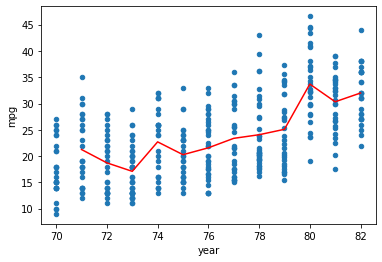

In [20]:
# we might treat categorical data as numerical but if would have diffrent meaning
# scatter-plot data
ax = df.plot(x='year', y='mpg', kind='scatter')

# plot regression line on the same axes
p = result.params
x = np.arange(71, 83, 1)
ax = ax.plot(x, [p.Intercept + p['year[T.{}]'.format(i)] for i in x], 'r' )

for y in p.items():
    print(y)



In [14]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     24.35
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           2.41e-40
Time:                        13:49:04   Log-Likelihood:                -1267.3
No. Observations:                 397   AIC:                             2561.
Df Residuals:                     384   BIC:                             2612.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.6897      1.112     15.907      0.000      15.503      19.876
year[T.71]     3.5603      1.587      2.244      0.025       0.441       6.680
year[T.72]     1.0246      1.587      0.646      0.519      -2.095       4.144
year[T.73]    -0.5897      1.461     -0.404      0.687      -3.461       2.282
year[T.74]     5.0140      1.602      3.131      0.002       1.865       8.163
year[T.75]     2.5770      1.560      1.652      0.099      -0.489       5.643
year[T.76]     3.8839      1.514      2.566      0.011       0.907       6.860
year[T.77]     5.6853      1.587      3.583      0.000       2.566       8.805
year[T.78]     6.3715      1.494      4.264      0.000       3.433       9.310
year[T.79]     7.4034      1.573      4.707      0.000       4.311      10.496
year[T.80]    16.0069      1.573     10.178      0.000      12.915      19.099
year[T.81]    12.6448      1.573      8.040      0.000       9.553      15.737
year[T.82]    14.3103      1.560      9.176      0.000      11.244      17.377
==============================================================================
Omnibus:                       21.680   Durbin-Watson:                   0.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.927
Skew:                           0.324   Prob(JB):                     0.000946
Kurtosis:                       2.350   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Który model lepszy?
Ten który traktuje rok jako wartość kategorii

### Co gdyby było więcej wartości dla `year`?
* Ciągły - nic.
* Kategorie - więcej parametrów do uczenia.

### Który model prostszy do uczenia?
Ten z danymi ciągłymi - ma mniej parametrów do uczenia.